# Non-negative pseudo inverse

In [1]:
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import inv, solve
from scipy.optimize import nnls

Considérons A une matrice carrée réelle inversible de taille $n$. Considérons également l'application $f_{A} : b \mapsto \underset{x}{\min} ||Ax-b||$.

C'est une application bien connue : $f_A(b) = A^{-1}b$, et son jacobien vaut exactement $A^{-1}$.

Raisonnons toujours à $A$ fixée. Afin d'évaluer $f_A$ en un $b$, il est avantageux en terme de complexité de résoudre le système linéaire associé. En revanche, si l'on souhaite évaluer $f_A$ en $k$ vecteurs $b$ distincts, dès que $k$ est plus grand que $n$ il devient avantageux de calculer $A^{-1}$ et de la stocker :

In [2]:
def f1(n, bs):
    A = np.random.randn(n, n)
    st = perf_counter()
    solve(A, bs)
    return perf_counter()-st


def f2(n, bs):
    A = np.random.randn(n, n)
    st = perf_counter()
    A_inv = inv(A)
    A_inv@bs
    return perf_counter()-st


n = 100

k = [5, 10, 25, 50, 75, 100, 150, 200, 500, 750, 1000, 2500, 5000, 7500]
bs = [np.random.randn(n, _) for _ in k]

t1 = [f1(n, _) for _ in bs]
t2 = [f2(n, _) for _ in bs]

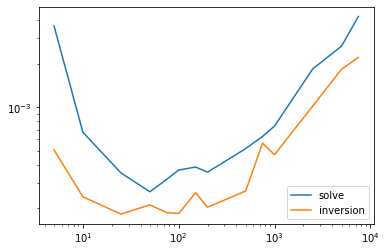

In [3]:
plt.plot(k, t1, label="solve")
plt.plot(k, t2, label="inversion")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()